In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_excel('regression model dataset.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [3]:
#renaming columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

df = df.rename(columns=column_names)
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
simple_linear_reg_df.head()

,Relative_Compactness,Cooling_Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59


In [24]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<Axes: xlabel='Relative_Compactness', ylabel='Cooling_Load'>

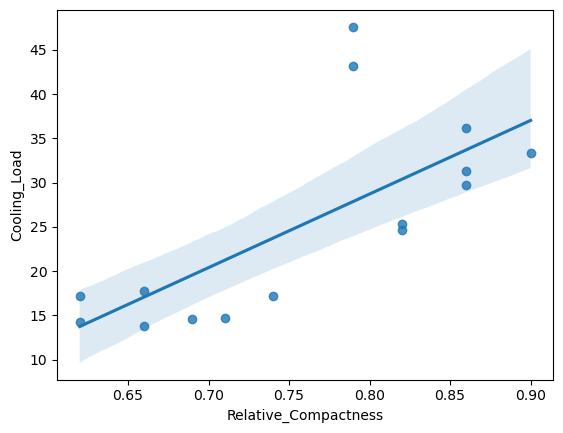

In [3]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
data=simple_linear_reg_df)

In [ ]:
#measuring regression performance

In [5]:
#USING Mean Absolute Error (MAE) 
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

#Now, we split our dataset into the training and testing dataset. Recall that we
#had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)


#fit the model to the training dataset
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) #prints 0.063


0.063

In [15]:
predicted_values

array([0.18884277, 0.58166504, 0.74304199, 0.71459961, 0.76123047,
       0.2467041 , 0.16711426, 0.60668945, 0.24194336, 0.54736328,
       0.31652832, 0.66235352, 0.69482422, 0.30151367, 0.18664551,
       0.71777344, 0.57177734, 0.31396484, 0.25915527, 0.74560547,
       0.70056152, 0.06750488, 0.61047363, 0.3248291 , 0.21081543,
       0.74768066, 0.33215332, 0.1842041 , 0.80102539, 0.2668457 ,
       0.68164062, 0.73730469, 0.14001465, 0.2824707 , 0.56347656,
       0.80786133, 0.33312988, 0.13330078, 0.72351074, 0.24401855,
       0.82263184, 0.15612793, 0.10864258, 0.16345215, 0.11425781,
       0.15100098, 0.48474121, 0.69128418, 0.7565918 , 0.72033691,
       0.09814453, 0.66809082, 0.09509277, 0.24780273, 0.76525879,
       0.76989746, 0.73937988, 0.62805176, 0.14929199, 0.296875  ,
       0.18994141, 0.59594727, 0.6048584 , 0.76623535, 0.56872559,
       0.9251709 , 0.68347168, 0.31762695, 0.67272949, 0.23583984,
       0.54418945, 0.2487793 , 0.22998047, 0.72277832, 0.28344

In [14]:
normalised_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [5]:
#USING Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) #prints 1.823

1.823

In [6]:
#USING Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) #prints 0.089

0.089

In [7]:
#USING R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) #prints 0.893

0.893

In [14]:
#comparing the effects of regularisation

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

def get_weights_df(linear_model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Surface_Area,-6.021301e+12,-0.062275,0.000000
1,Relative_Compactness,-5.798957e-01,-0.283471,-0.027719
2,Orientation,3.113887e-03,0.003369,0.000000
3,Glazing_Area_Distribution,2.857071e-02,0.029088,0.021431
4,Glazing_Area,2.152462e-01,0.212449,0.206132
5,Overall_Height,3.976656e-01,0.442467,0.463482
6,Wall_Area,3.512426e+12,0.103061,0.200087
7,Roof_Area,4.515976e+12,-0.163192,-0.000000


In [11]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [12]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)